In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.stattools
import statsmodels 
import scipy.stats as stats
import warnings
import itertools
import matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.stats.diagnostic import lilliefors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

In [6]:
df = pd.read_csv('data/Pecanstreet/participants_data/1hour/features/all/661_all_features.csv')

In [7]:
df.consumption

0       0.504900
1       1.849450
2       1.464517
3       1.412817
4       1.120733
          ...   
8754    2.156367
8755    1.913050
8756    1.639217
8757    1.982983
8758    1.814567
Name: consumption, Length: 8759, dtype: float64

In [8]:
n = int(len(df.consumption) * 0.7)
train_set = df.consumption[:n]
test_set =df.consumption[n:]

In [11]:
model_train = SARIMAX(train_set,  order=(4,1,3), seasonal_order=(2,0,2,12)).fit()
model_test = SARIMAX(test_set,  order=(4,1,3), seasonal_order=(2,0,2,12)).fit(model_train.params)
erro = (model_test.resid ** 2).mean()
print(erro)

/Users/paulovitorbarbosaramos/opt/anaconda3/envs/consumption-forecasting/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/paulovitorbarbosaramos/opt/anaconda3/envs/consumption-forecasting/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81177D+00    |proj g|=  1.85494D-01


 This problem is unconstrained.



At iterate    5    f=  1.70759D+00    |proj g|=  8.33812D-02

At iterate   10    f=  1.64191D+00    |proj g|=  2.48135D-02

At iterate   15    f=  1.63544D+00    |proj g|=  3.71813D-03

At iterate   20    f=  1.63502D+00    |proj g|=  2.72753D-03

At iterate   25    f=  1.63427D+00    |proj g|=  8.67006D-03

At iterate   30    f=  1.63209D+00    |proj g|=  7.10611D-03

At iterate   35    f=  1.63189D+00    |proj g|=  8.24170D-04

At iterate   40    f=  1.63177D+00    |proj g|=  1.56002D-03

At iterate   45    f=  1.63175D+00    |proj g|=  7.42860D-04

At iterate   50    f=  1.63175D+00    |proj g|=  4.93140D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/paulovitorbarbosaramos/opt/anaconda3/envs/consumption-forecasting/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60077D+00    |proj g|=  6.33621D-02


 This problem is unconstrained.



At iterate    5    f=  1.59018D+00    |proj g|=  2.47892D-03

At iterate   10    f=  1.58996D+00    |proj g|=  1.62011D-03

At iterate   15    f=  1.58948D+00    |proj g|=  5.25415D-03

At iterate   20    f=  1.58937D+00    |proj g|=  5.42681D-03

At iterate   25    f=  1.58877D+00    |proj g|=  5.23709D-03

At iterate   30    f=  1.58819D+00    |proj g|=  2.00203D-03

At iterate   35    f=  1.58780D+00    |proj g|=  4.44544D-03

At iterate   40    f=  1.58746D+00    |proj g|=  3.10653D-03

At iterate   45    f=  1.58740D+00    |proj g|=  5.65564D-04


/Users/paulovitorbarbosaramos/opt/anaconda3/envs/consumption-forecasting/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  1.58739D+00    |proj g|=  6.42075D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     58      1     0     0   6.421D-04   1.587D+00
  F =   1.5873906291613746     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
1.4088372720662563


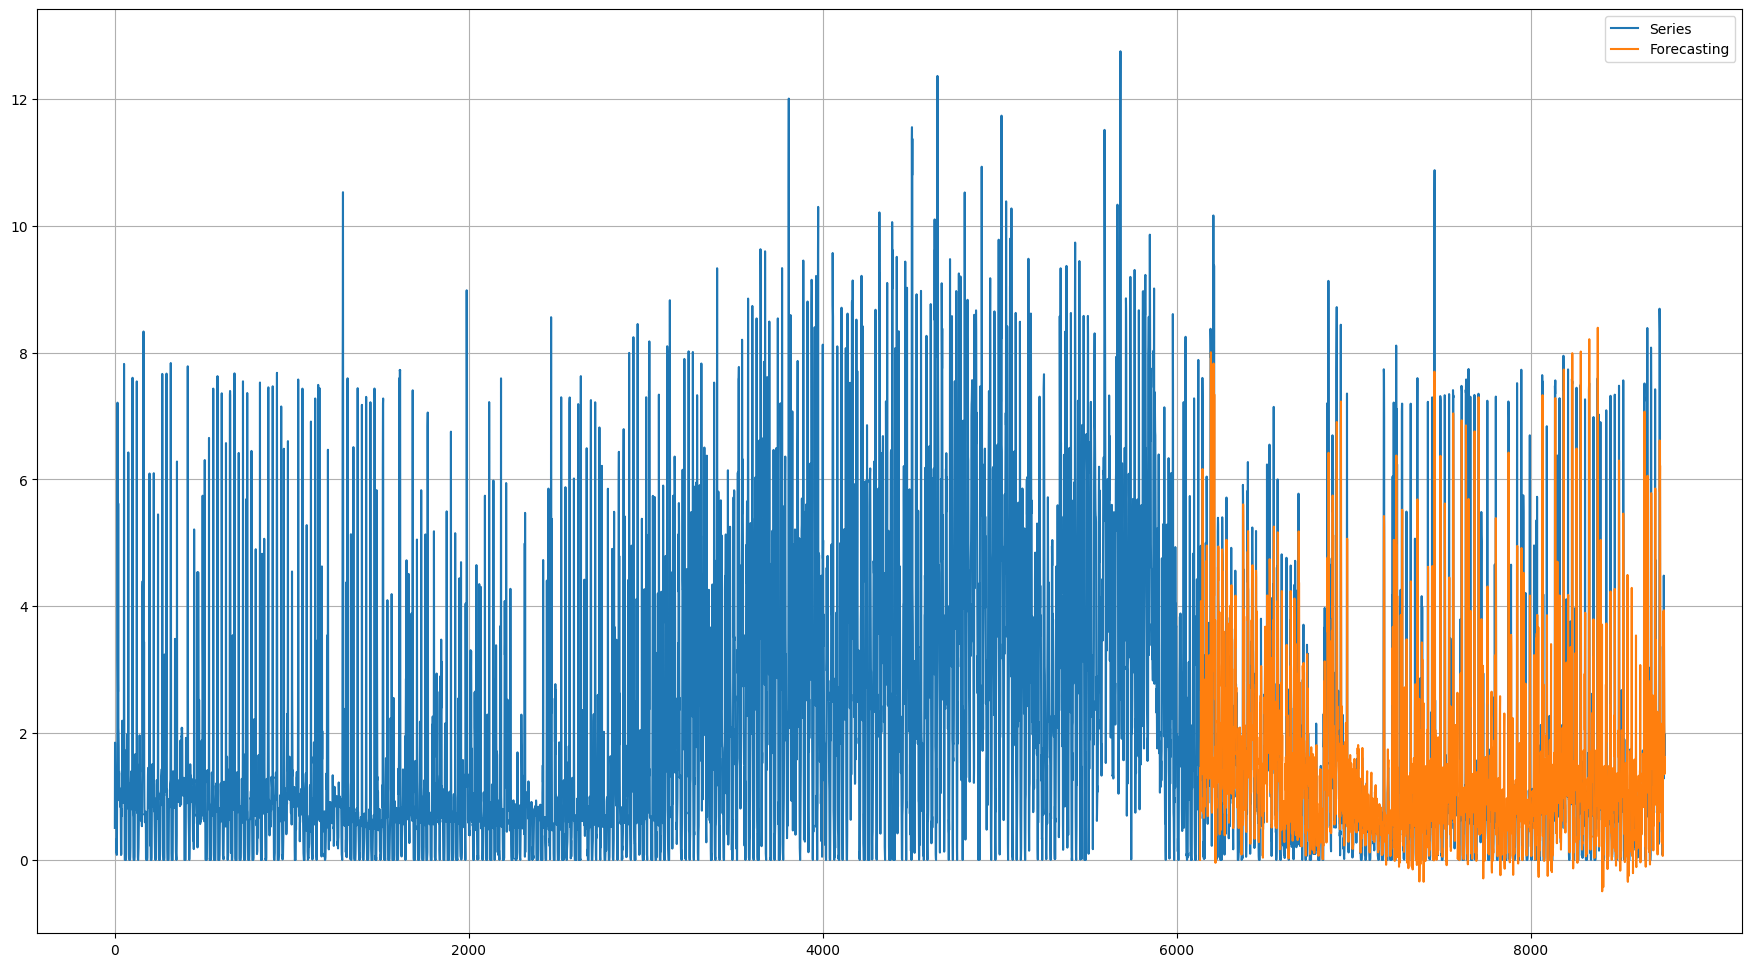

In [12]:
plt.figure(figsize=(22, 12))
#plt.plot(train_set, label='Train_set')
#plt.plot(test_set,label='Test_set')
plt.plot(df.consumption,label='Series')
plt.plot(model_test.predict(typ='levels'),label='Forecasting')
plt.legend(loc='best')
plt.grid()
plt.show()

In [13]:
futuro = model_test.predict(typ='levels')

In [17]:
futuro

pandas.core.series.Series

In [18]:
result = [{
        'test|MAE': mean_absolute_error(test_set, futuro),
        'test|MAPE': mean_absolute_percentage_error(test_set, futuro),
        'test|MSE': mean_squared_error(test_set, futuro),
        'model': 'SARIMA'
    }]


In [21]:
test_preds = []
for preds, labels in zip(list(futuro), test_set.to_list()):
    test_preds.append(dict(
        model='SARIMAX',
        label=float(labels),
        model_output=float(preds)
    ))


In [23]:
model_infer = pd.DataFrame(test_preds)

In [24]:
model_infer

,model,label,model_output
0,SARIMAX,1.451433,0.000000
1,SARIMAX,0.723967,1.451433
2,SARIMAX,0.653950,0.836894
3,SARIMAX,1.800367,0.762037
4,SARIMAX,2.121550,1.703322
...,...,...,...
2623,SARIMAX,2.156367,2.844748
2624,SARIMAX,1.913050,2.178270
2625,SARIMAX,1.639217,1.354507
2626,SARIMAX,1.982983,1.623007


In [14]:
#Análises dos erros
futuro = model_test.predict(typ='levels')
valores_previstos=[]
for i in range(1,len(futuro)):
  valores_previstos.append(futuro.values[i])
  valores_reais = test_set[1:].tolist()
valores_reais =np.array(valores_reais)
valores_previstos =np.array(valores_previstos)
erros = np.abs(valores_reais - valores_previstos)
soma_erros = np.sum(erros)
#Cálculo do erro médio absoluto (MAE): 
MAE = soma_erros/len(valores_reais)
#Cálculo  do erro quadrático médio (MSE)
erro_quadratico = (np.array(valores_reais) - np.array(valores_previstos))**2.0
soma_erro_quadratico = np.sum(erro_quadratico)
MSE = soma_erro_quadratico/len(valores_reais)
#Cálculo da raiz do erro quadrático médio (RMSE)
RMSE = np.sqrt(MSE)
#Cálculo absoluto percentual médio (MAPE)
soma_erro_percentual = np.sum(np.abs((erros)/valores_previstos))
MAPE = soma_erro_percentual*100/len(valores_reais)
#Precisão do modelo
precisao=100-MAPE

print('-'*60)
print('Análises da acurária do modelo SARIMA')
print("MAE = {:0.3f}".format(MAE))
print("MSE = {:0.4f}".format(MSE))
print("RMSE = {:0.3f}".format(RMSE))
print("MAPE = {:0.2f}%".format(MAPE))
print('Precisão do modelo: {:0.2f}%'.format(precisao))
print('-'*60)

------------------------------------------------------------
Análises da acurária do modelo SARIMA
MAE = 0.705
MSE = 1.4086
RMSE = 1.187
MAPE = 137.08%
Precisão do modelo: -37.08%
------------------------------------------------------------


In [15]:
print('MSE', mean_squared_error(valores_previstos, valores_reais))
print('RMSE', mean_squared_error(valores_previstos, valores_reais, squared=False))
print('MAE', mean_absolute_error(valores_previstos, valores_reais))
print('MAPE', mean_absolute_percentage_error(valores_previstos, valores_reais))

MSE 1.4085716377118427
RMSE 1.1868326072837074
MAE 0.7051841004820366
MAPE 1.370806275088035
